# Multivariate polynomial regression 

Because our linear regression model could predict house prices with negative sale prices, we decided to try polynomial regression. 

C:\Users\gwyne\anaconda3\envs\progLab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

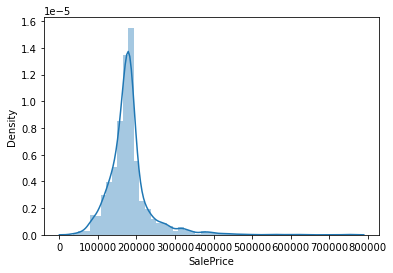

In [61]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns

# load in the data as pandas dataframe
total_data = pd.read_csv('total_data.csv', sep=";")

# Shuffle the data (test data is now last half of the data)
total_data = shuffle(total_data)

# Check the distribution of y 
y_total = total_data["SalePrice"]

# plot histogram 
sns.distplot(y_total)

In [62]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

def cleaning(dataframe):
    """
    This function corrects any missing values in a pandas dataframe
    returns the cleaned dataframe
    """
    
    # loop through all the features/columns in the training data
    for column in dataframe:

        # check whether the data in each column is numerical
        if is_numeric_dtype(dataframe[column]):

            # if the data is numerical compute the mean of the whole column values
            column_mean = dataframe[column].mean()

            # replace the missing values in this column with the mean of the column
            dataframe[column] = dataframe[column].fillna(column_mean)

        # also replace categorical missing values
        # check this approach!
        else:
            dataframe[column] = dataframe[column].fillna(dataframe[column].value_counts().index[0])
    
    return dataframe

# clean the total data
total_data = cleaning(total_data)

# Garage cars

As we did with the linear regression model, we created a polynomial model for the top 3 features which correlated the most with the sale price; GagarageCars, GrLivArea, OverallQual. 

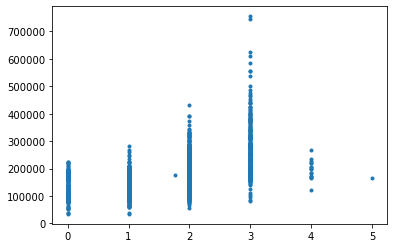

In [78]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# select only GarageCars
train_cars = total_data[["GarageCars", "SalePrice"]].sort_values(by=["GarageCars"])

# select x and y, keep same shape
X_train = train_cars.iloc[:, 0:1].values
y_train = train_cars.iloc[:, 1:2].values

# plot data
plt.plot(X_train, y_train, ".")
plt.show()


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

# transform X to polynomial 
poly_train = PolynomialFeatures(degree=3)
poly_train_features = poly_train.fit_transform(X_train)

# split data in test and train
X_train_cars, X_test_cars, y_train_cars, y_test_cars = train_test_split(poly_train_features, y_train, test_size=0.3, random_state=42)

# create model
cars_model = LinearRegression()

# train the model
cars_model.fit(X_train_cars, y_train_cars)

# predict y 
y_cars_predicted = cars_model.predict(X_test_cars)

# compute error of the model with RMSE and RMSLE
cars_rmse = np.sqrt(mean_squared_error(y_test_cars, y_cars_predicted))
print("RMSE:", cars_rmse)

cars_rmsle = np.sqrt(mean_squared_log_error(y_test_cars, y_cars_predicted))
print("RMSLE:", cars_rmsle)

RMSE: 47328.20525677931
RMSLE: 0.2533810288595774


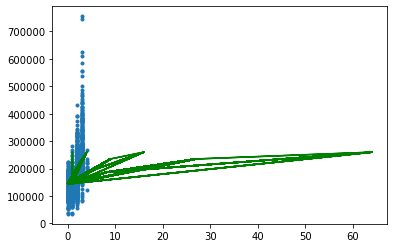

In [80]:
# visualize the predicted line
plt.plot(X_train, y_train, ".")
plt.plot(X_train_cars, cars_model.predict(X_train_cars), color="green")
plt.show()

# Overall quality

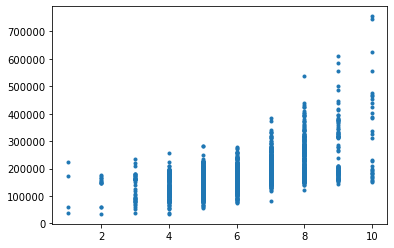

In [81]:
# select only GarageCars
train_qual = total_data[["OverallQual", "SalePrice"]].sort_values(by=["OverallQual"])

# select x and y, keep same shape
X_train = train_qual.iloc[:, 0:1].values
y_train = train_qual.iloc[:, 1:2].values

# plot data
plt.plot(X_train, y_train, ".")
plt.show()

In [82]:
# transform X in polynomial 
poly_train_qual = PolynomialFeatures(degree=1
                                    )
poly_train_features_qual = poly_train_qual.fit_transform(X_train)

# select test and train
X_train_qual, X_test_qual, y_train_qual, y_test_qual = train_test_split(poly_train_features_qual, y_train, test_size=0.3, random_state=42)

# compute the model
qual_model = LinearRegression()

# train the model
qual_model.fit(X_train_qual, y_train_qual)

# predict y 
y_qual_predicted = qual_model.predict(X_test_qual)

# compute error of the model RMSE and RMSLE
qual_rmse = np.sqrt(mean_squared_error(y_test_qual, y_qual_predicted))
print("RMSE:", qual_rmse)

qual_rmsle = np.sqrt(mean_squared_log_error(y_test_qual, y_qual_predicted))
print("RMSLE:", qual_rmsle)

RMSE: 47159.79375221806
RMSLE: 0.24172702558138245


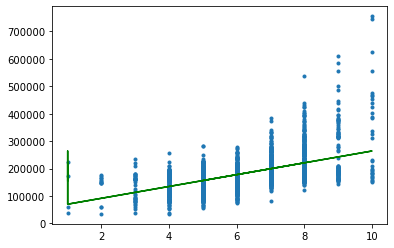

In [83]:
# visualize the predicted line
plt.plot(X_train, y_train, ".")
plt.plot(X_train_qual, qual_model.predict(X_train_qual), color="green")
plt.show()

# GrLivArea

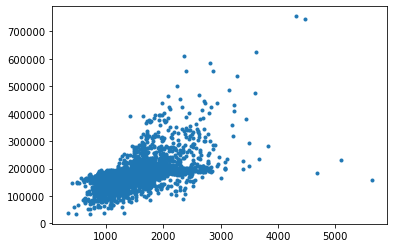

In [84]:
# select only GrLivArea
train_area = total_data[["GrLivArea", "SalePrice"]].sort_values(by=["GrLivArea"])

# select x and y, keep same shape
X_train = train_area.iloc[:, 0:1].values
y_train = train_area.iloc[:, 1:2].values

# plot data
plt.plot(X_train, y_train, ".")
plt.show()


In [85]:
# transform X in polynomidal
poly_train_area = PolynomialFeatures(degree=3)
poly_train_features_area = poly_train_area.fit_transform(X_train)

# split data in test and train
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(poly_train_features_area, y_train, test_size=0.3, random_state=42)

# create model
area_model = LinearRegression()

# train model
area_model.fit(X_train_area, y_train_area)

# predict y 
y_area_predicted = area_model.predict(X_test_area)

# compute error of the model RMSE and RMSLE
area_rmse = np.sqrt(mean_squared_error(y_test_area, y_area_predicted))
print("RMSE:", area_rmse)

area_rmsle = np.sqrt(mean_squared_log_error(y_test_area, y_area_predicted))
print("RMSLE:", area_rmsle)

RMSE: 50030.6455377856
RMSLE: 0.22735671816495948


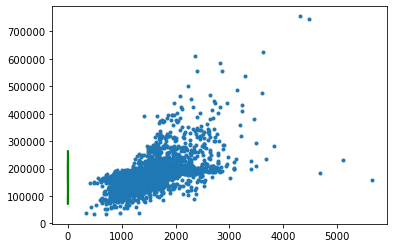

In [86]:
# visualize the predicted line
plt.plot(X_train, y_train, ".")
plt.plot(X_train_qual, qual_model.predict(X_train_qual), color="green")
plt.show()

The RMSE of all three features were between 40.000 and 50.000. These values did not necessarily improved as we had hoped. 

# Multivariate polynomial regression 

The next step was to create a polynomial regression model for multiple features to see if adding more features to our model would improve the performance of the model. 

We created two models, the first one with the three features from above combined: GrLivArea, OverallQual and GarageCars.

In the second model we created a model for the top eight best features: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd.

In [87]:
# select top 3 features
top_3 = total_data[["GrLivArea", "OverallQual", "GarageCars", "SalePrice"]]

# split data in X and y
X3, y3 = top_3[["GrLivArea", "OverallQual", "GarageCars"]], top_3["SalePrice"]

In [88]:
# transform X into polynomial 
poly3 = PolynomialFeatures(degree=3)
poly3_features = poly3.fit_transform(X3)

# split data in test and train 
X3_train, X3_test, y3_train, y3_test = train_test_split(poly3_features, y3, test_size=0.3, random_state=42)

# scale the training data
scaler3 = MinMaxScaler()

# scale the train data
X3_train = scaler3.fit_transform(X3_train)

# apply same scale on test data
X3_test = scaler3.transform(X3_test)

In [89]:
# create the model 
multi_poly3 = LinearRegression()

# train the model
multi_poly3.fit(X3_train, y3_train)

# predict y 
y3_predicted = multi_poly3.predict(X3_test)

# compute error of the model with RMSE and RMSLE
poly3_rmse = np.sqrt(mean_squared_error(y3_test, y3_predicted))
print("RMSE:", poly3_rmse)

poly3_rmsle = np.sqrt(mean_squared_log_error(y3_test, y3_predicted))
print("RMSLE:", poly3_rmsle)

RMSE: 41027.8713281842
RMSLE: 0.22092099846950372


Adding features to our polynomial model did not decrease the RMSE of our model

### 8 best features 

In [90]:
# select the top 8 features 
top_8 = total_data[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "SalePrice"]]

# split the data in X and y  
X8, y8 = top_8[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd"]], top_8["SalePrice"]

In [91]:
# transform the X values in polynomial
poly8 = PolynomialFeatures(degree=3)
poly8_features = poly8.fit_transform(X8)

X8_train, X8_test, y8_train, y8_test = train_test_split(poly8_features, y8, test_size=0.3, random_state=42)

# scale all the features of the data for quicker convergence
scaler8 = MinMaxScaler()

# fit the scale on the training data
X8_train = scaler8.fit_transform(X8_train)

# apply this scale to the test data
X8_test = scaler8.transform(X8_test)

In [92]:
# create the model 
multi_poly8 = LinearRegression()

# train the model
multi_poly8.fit(X8_train, y8_train)

# compute predictions for y
y8_predicted = multi_poly8.predict(X8_test)

# compute error of the model with RMSE
poly8_rmse = np.sqrt(mean_squared_error(y8_test, y8_predicted))
print("RMSE:", poly8_rmse)

# gives error because there are negative values
# poly8_rmsle = np.sqrt(mean_squared_log_error(y8_test, y8_predicted))
# print("RMSLE:", poly8_rmsle)

RMSE: 44032.19626886836


Adding 8 features to our model resulted in a much higher RMSE and all our previous models. 